 # Comparing RSA and decoding: Not so different after all

Jessica Loke, Susanne de Mooij, University of Amsterdam, Pattern Analysis 2017

<div class='alert alert-info'>
**General feedback**: Well done, Jessica & Susanne! You wrote a conherent and concise report in which each step is clearly explained. I think your intro and discussion/conclusion could have gone into a little more detail on *why* conceptual RDMs and decoding yield similar results. Apart from that, good job! 


<br><br>
Argumentation analysis (10%):  8<br><br>
Embedding in literature (5%): 9<br><br>
Implementation analysis (55%): 9<br><br>
Clarity (30%): 9<br><br>
Total: 8.9
</div>

## Abstract

Representational similarity analysis (RSA) and decoding analysis are popular applications of multivariate pattern analysis. Although both are similar conceptually, the actual similarities and differences are not well-known. In this study, we aim to compare conceptual RSA with decoding. Both analyses are performed on the Sharedstates dataset where 19 participants infer others' emotional processing. The analyses are fitted on each participant, giving us a total of 19 correlations (RSA) and accuracy scores (decoding) for 7 brain regions of interest. We hypothesize that output from both analyses are similar, as we predict both RSA and decoding to model the same class-specific information. The similarity is tested with a spearman correlation on the output of both analyses. As predicted, outputs from both analyses highly correlate with each other for every brain region of interest. This high correlation could be due to the models capturing variances between participants instead of information relevant to the research questions. In addition, the model evaluation of RSA and decoding separately revealed that RSA is a more sensitive analysis compared to decoding analysis. Further research is needed to elucidate similarities and differences between both techniques.

<div class='alert alert-info'>
**Feedback**: clear.
</div>

## Introduction
One of the greatest challenge for neuroscience is to extract information from patterns of neural activity. In the last decade, algorithms were developed to decode neural activity. Altogether, these methods are known as multivariate pattern analysis (MVPA). MVPA has revolutionized neuroscientific research because it can integrate information across different spatial scales of brain function, which was not possible with traditional univariate analysis techniques (Haxby, 2012).
	
The most popular applications of MVPA are decoding (Pereira et al., 2009) and more recently, Representational Similarity Analysis (RSA; Kriegeskorte & Kievit, 2013). Both these methods use patterns of brain activity in their models but in a different way. Using fMRI data, decoding uses machine learning classifiers to decode stimuli, behaviours and other variables of interest. Decoding analysis reveals whether class-specific information is present in the neuroimaging data. On the other hand, RSA goes beyond seperability and tests hypothesis about the structure of brain activity. The method used is known as representational geometry. This is the crucial distinction between RSA and decoding analysis. According to the logic of both analyses, we would expect stimuli with distinct neural representations to be easier to decode and stimuli with similar representations more difficult to decode. WIth RSA, its representational geometry gives us an idea of how different brain patterns are, whereas decoding only measures if brain patterns are different. Both analyses are only used seperately in neuroimaging studies and the similarity or differences between these applications are still unclear. 


<div class='alert alert-info'>
**Feedback**: Your explanation about the similarities and differences between RSA/decoding are on point. But the linear separability (decoding) vs. representational geometry (RSA) difference does not really hold (I think) for conceptual RDMs, which only assess whether conditions are different. Exactly this premise seems to suggest that these analyses might (or should) lead to similar results.
</div>

## Current study

While conceptually RSA and decoding are very different, the applications also seem very similar in their outcome, since both have some measure of the differentiability of brain patterns. In our study, we compare conceptual RSA models (assuming the existence of features) and decoding analysis to see how similar or different these applications really are. Since the outcomes of both methods give a measure of the similarity in class-specific information, we hypothesize that RSA performance correlates highly with decoding accuracy across subjects. With this study we aim to find out whether these two types of analyses model the same information. This could help future research to decide whether it is relevant to use both applications or not. 

<div class='alert alert-info'>
**Feedback**: Ah, never mind the above feedback-box - you explained the potential similarity in analysis here (and clearly so).
</div>

## Methods

### Experimental stimuli and procedure
To compare RSA and decoding analysis, we’ll use the SharedStates dataset which is other-focused. In the original experiment, twenty-two participants had to observe 90 images differentiated into equal number of action, interoception or situational trials. (Within the analyses, however, only data from 19 participants were used.) Experimental trials were created to predispose participants into different types of emotional processing. Before different trials, participants were cued with different words – 1. “How” (action trials), 2. “What” (interoception trials), and 3. “Why” (situational trials). Through observation of the images and cues, participants had to infer how individuals within the images would engage in emotional processing. 

We’ll perform both the RSA and decoding analyses on the dataset. These analyses will be performed on every subject individually (within-subject analyses), obtaining a correlation (for RSA) and accuracy score (for decoding analysis). Then, we will perform a correlation between both the correlation and accuracy to make a comparison between output from both analyses. Based on current literature (e.g. Johnson et al., 2006), we have selected seven regions of interest (ROIs) – supramarginal gyrus (anterior), supramarginal gyrus (posterior), frontal pole, angular gyrus, frontal medial gyrus, precentral gyrus, and posterior cingulate cortex. These ROIs will be used in both RSA and decoding analysis to maintain the fairness of the comparison.

We performed a RSA for the three different trials. There are three different types of confirmatory RSA. Here, we use a conceptual model which assumes differences between action, interoception and situational trials. There are a few steps involved in this confirmatory conceptual model.

In [1]:
# Import all functions/classes/methods
from functions import Mvp 
from glob import glob
from skbold.utils import load_roi_mask
import numpy as np
import os.path as op
import nibabel as nib
from functions import make_conceptual_rdm
from sklearn.metrics.pairwise import pairwise_distances
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon as wx
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import scipy
from scipy import stats

/opt/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Representational Similarity Analysis (RSA)
First, we loaded in the data with voxel dimension (80, 80, 37) for every subject. Next, we loaded in the masks for the seven ROIs specified earlier using the Cortical and Subcortical Harvard Oxford Atlas and transformed the mask to every subject's native space (80,80,37). Therefore, we are only examining voxels within masks indices. We used the ravel function to transform the data to two dimensions (90,236800). 

Second, and crucially within RSA, we created dissimilarity spaces. We transformed the brain representation into dissimilarity space and also did the same for the conceptual model with 90 trials, creating a dissimilarity matrix of 90x90 dimensions. Dissimilarity is simply the distance of points within the 3-dimensional space distinguishing the three different trial types. There are multiple ways to calculate the distance. Within our analysis, we use pairwise difference to calculate this distance using the metric "correlation". After the transformation, we have two representation dissimilarity matrices (RDMs) for the conceptual model and brain patterns. These RDMs are 2 dimensional with shape (90,90), representing the 90 different trials. Since the matrices are symmetrical, we extracted indices from the upper half. Lastly, we utilized Spearman Rank Correlation to examine the similarity of both matrices. If our conceptual model is valid, we would observe a large amount of similarity between both the dissimilarity matrices of the conceptual model and brain patterns.

<div class='alert alert-info'>
**Feedback**: clear!
</div>

In [2]:
### code for entire RSA
brain_rdms = np.zeros((90*(90-1)/2, 19)) # matrix of (N*(N-1)/2)-by-19 (19 subjects) for brain rdm

# path to every subject which we use to loop over the subjects
subjectpaths = glob('/home/nipa_9/SharedStates/OTHER/sub*/')
subcorrelation = np.zeros((19,7)) # matrix for correlations of every subject (N= 19) per region (N=7)

# Loop over subjects
for i, path in enumerate(subjectpaths):
    # loading the feat.stat files and sort it by order of trials
    subpath = glob(path +'other.feat/stats/tstat*')
    subpath = sorted(subpath, key=lambda x: int(op.basename(x).split('.')[0].split('tstat')[-1]))
    
    # Use the class Mvp to load in the data with voxel dimensions: 80,80,37
    sub = Mvp(subpath)
    sub.load(voxel_dims=(80, 80, 37))
 
    # List of seven masks
    my_rois = ['Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Frontal Pole', 
               'Angular Gyrus', 'Frontal Medial Cortex', 'Precentral Gyrus', 'Cingulate Gyrus, posterior division']

    # Loop over every ROI
    for j,roi in enumerate(my_rois):
        # directory to subject path to transform the mask to subject's native space (80*80*37)
        reg_dir_of_sub = path + '/other.feat/reg'
        
        # load the mask of subcortical and cortical Harvard Oxford atlas
        if roi=='Amygdala':
            mask, mask_name = load_roi_mask(roi, atlas_name='HarvardOxford-Subcortical', lateralized=False,
                                           reg_dir=reg_dir_of_sub)
        else:
            mask, mask_name = load_roi_mask(roi, atlas_name='HarvardOxford-Cortical', lateralized=False,
                                           reg_dir=reg_dir_of_sub)
            
        # Apply the mask to data and flatten X to two dimensions (90,236800)
        new_X = sub.X[:, mask.ravel()]
        
        # labels of the trials (30 trials for each condition)
        x = np.array(["Actie", "Interoception", "Situation"])
        labels = np.repeat(x, 30)
        
        # Make conceptual rdm according to the labels
        conc_rdm = make_conceptual_rdm(labels)
        
        # Make brain rdm using pairwise distances with metric "correlation"
        brain_rdm = pairwise_distances(new_X, metric='correlation')

        # Use np.triu_indices to index both conc_rdm and brain_rdm
        n = len(labels)
        conc_rdm_triu = conc_rdm[np.triu_indices(n=n, k=1)]
        brain_rdm_triu = brain_rdm[np.triu_indices(n=n, k=1)]

        # calculate the correlation between conceptual and brain rdm for every subject 
        brain_rdms[:,i] = brain_rdm_triu
        correlation, pvalue = spearmanr(conc_rdm_triu, brain_rdm_triu)
        subcorrelation[i,j] = correlation


<div class='alert alert-info'>
**Feedback**: Very clear code.
</div>

The plot below serves as an example to show the brain and conceptual RDM of the Cingulate Gyrus. Blue means more similarity whereas red is less similarity. 

The plot has evidently shown us that the brain representations are rather similar between different trials. 

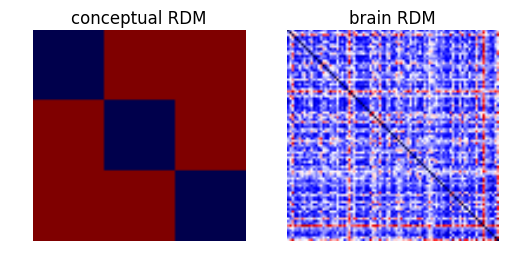

In [3]:
# plot of conceptual(left) and brain rdm (right)
plt.subplot(1,2,1)
plt.imshow(conc_rdm, cmap='seismic')
plt.title("conceptual RDM")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(brain_rdm, cmap='seismic')
plt.title("brain RDM")
plt.axis('off')
plt.show()

### Decoding
Next, we performed a decoding analysis for the three different features. There are different types of decoding analysis within machine learning. Here, we chose a Logistic Regression, because it classifies the data to the different trial types well in most studies. The steps involved in this classification are described as follow.

First, we again loaded in the same data as with RSA (90 tstat files) with voxel dimensions (80,80,37), but additional to the steps in RSA we standardized the data ensuring that each feature is on the same scale. Then, we loaded in the mask of the same ROIs as with RSA from the Harvard Oxford Atlas, and applied it to the native space of each subject (80,80,37) and ravelled the data to two dimensions (90,236800). Our used target are the labels of the trials, so 30 trials for each feature (action, interoception, situation). Then we divided the data into 10 equal folds. Second, we ran 10 iterations through the folds, using one different fold each iteration for testing and the other nine of training the decoder. Third, we computed the mean accuracies from all 10 iterations on the test set, to get the final accuracy for the decoder. If the features provided to the decoder is valid, we would observe high decoding accuracy. 

<div class='alert alert-info'>
**Feedback**: I wouldn't say "if the *features* ... are valid" but rather "if the *model* is valid ... we would observe high decoding accuracy", with valid meaning based (largely) on signal (rather than noise).
</div>

In [ ]:
### Code for decoding

# path to every subject to loop over every subject
subjectpaths = glob('/home/nipa_9/SharedStates/OTHER/sub*/')
subaccuracy = np.zeros((19,7)) # matrix for accuracies of every subject (N= 19) per region (N=7)

# Loop over subjects
for i, path in enumerate(subjectpaths):
    # loading all 90 feat.stat files and sort it
    subpath = glob(path +'other.feat/stats/tstat*')
    subpath = sorted(subpath, key=lambda x: int(op.basename(x).split('.')[0].split('tstat')[-1]))
    
    # Use the class Mvp to load in the data (90 tstat files) with voxel dimensions (80,80,37)
    sub = Mvp(subpath)
    sub.load(voxel_dims=(80, 80, 37))
    sub.standardize()
 
    # list of every mask
    my_rois = ['Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Frontal Pole', 
               'Angular Gyrus', 'Frontal Medial Cortex', 'Precentral Gyrus', 'Cingulate Gyrus, posterior division']

    # Loop over every ROI
    for j,roi in enumerate(my_rois):
        
        # directory to subject path to transform the mask to subject's native space (80*80*37)
        reg_dir_of_sub = path + '/other.feat/reg'

        # load in mask from subcortical and cortical harvard oxford atlas
        if roi=='Amygdala':
            mask, mask_name = load_roi_mask(roi, atlas_name='HarvardOxford-Subcortical', lateralized=False,
                                           reg_dir=reg_dir_of_sub)
        else:
            mask, mask_name = load_roi_mask(roi, atlas_name='HarvardOxford-Cortical', lateralized=False,
                                           reg_dir=reg_dir_of_sub)
        
        # Apply the mask to data and ravel to two dimensions (90,236800)
        new_X = sub.X[:, mask.ravel()]
        
        # target labels of the trials (30 trials for each condition)
        y = np.array(["Actie", "Interoception", "Situation"])
        y = np.repeat(y, 30)
        
        # Logistic Regression classifier
        clf = LogisticRegression()
        
        # Split the data and target into 10 folds
        skf = StratifiedKFold(n_splits=10)
        folds= skf.split(new_X,y )
        
        # for every fold divide the data and target in test and train set. Next, fit the classifier and predict the test data
        accuracy = []
        for fold in folds:
            train_idx, test_idx = fold
            
            X_train = new_X[train_idx]
            y_train = y[train_idx]
            
            X_test = new_X[test_idx]
            y_test = y[test_idx]
            
            clf.fit(X_train, y_train)
            y_hat = clf.predict(X_test)
            # accuracy of the predicted values versus the target values
            accuracy.append(np.mean(y_hat==y_test))
       
        # Accuracy for every subject per region
        subaccuracy[i,j] = np.mean(accuracy)    

The plot below shows the accuracy frequency of every brain regions across the subjects. 

The plot has shown us that the decoding accuracies hover around chance level or below that, indicating a poor classifier. 

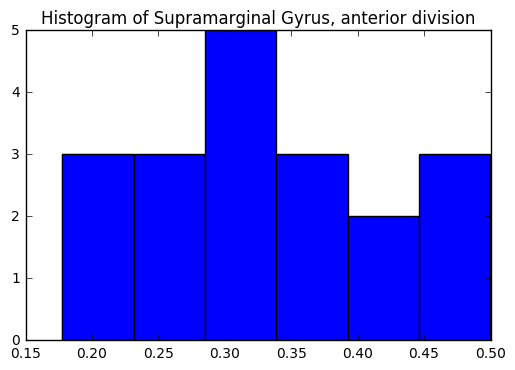

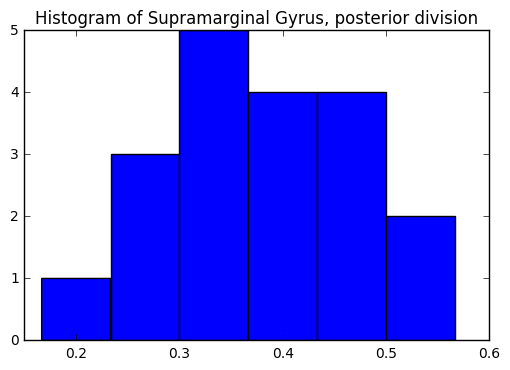

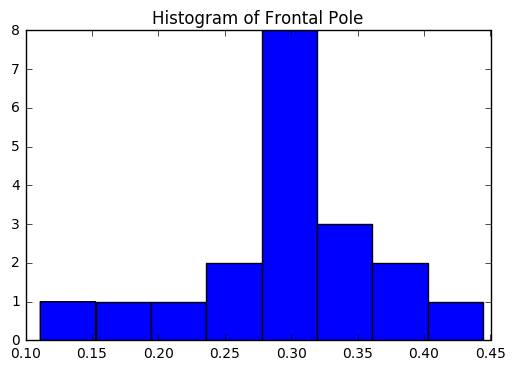

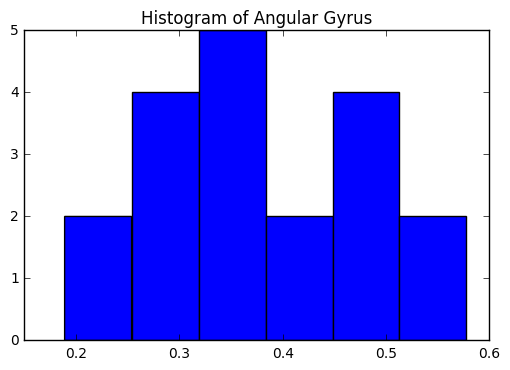

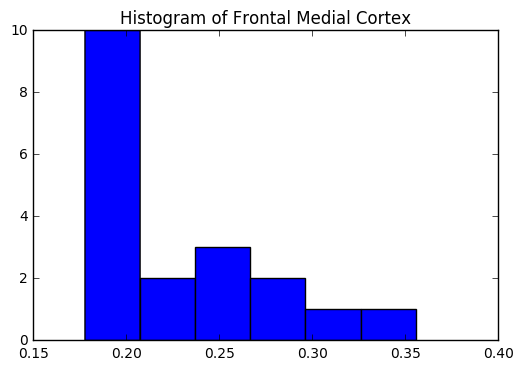

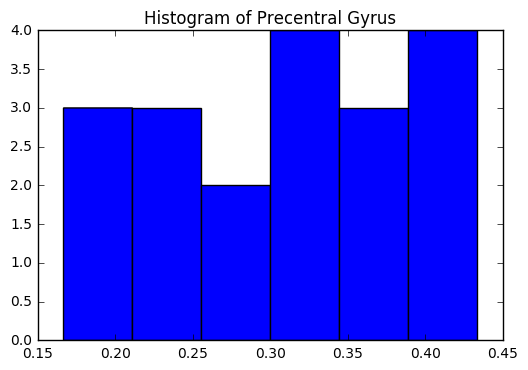

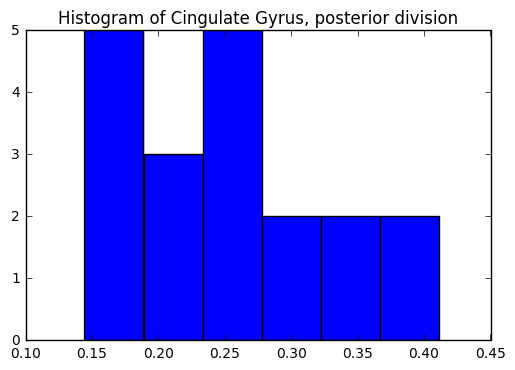

In [6]:
# Histogram accuracy across subjects of every brain region
for i in range(7):
    plt.hist(subaccuracy[:,i], bins='auto')
    plt.title("Histogram of %s" % my_rois[i])
    plt.show()

<div class='alert alert-info'>
**Feedback**: Hmm, interesting... Good that you plotted the accuracy scores! Plotting (almost) always gives you some more info on the (distribution) of your data.
</div>

### Model performance and statistical evaluation 
In order to evaluate model performance, we did a one sample t-test on the correlation scores from RSA for every ROI across all subjects. This t-test shows whether the correlation scores obtained are significantly different from 0.  Similarly, we did a one sample t-test for the decoding analysis. We tested if the accuracy scores obtained are significantly above .33 (chance level). Then, to compare the performance of both RSA and the decoding analysis, we calculated a Spearman correlation between both scores. Lastly, we illustrated the association between RSA and decoding with a scatterplot for every ROI.

### Results
The output below shows the results of the one sample t-test of every ROI of the RSA correlations across subjects. Overall the mean correlations across subjects is low around 0.02. However three brain regions were significantly different from zero, namely the Supramarginal Gyrus, anterior and posterior division and the Angular Gyrus. 

In [43]:
# One sample t-test to test whether the correlation of every brain regions is bigger than zero
for i in range(7):
    onesample_RSA = scipy.stats.ttest_1samp(subcorrelation[:,i], 0)
    # implement a one-sided t-test, so put negative tstats to zero and pvalue to 1
    if onesample_RSA[0]<0:
        tstat = 0
        pvalue = 1
    else:
        tstat= onesample_RSA[0]
        pvalue = onesample_RSA[1]/2
    print "The t-statistic in brain region %s is %.3f and the p-value is %.3f." % (my_rois[i],tstat,
                                                                                     pvalue)
    print "The mean correlation across subjects is %.3f" % np.mean(subcorrelation[:,i])
    print ""

The t-statistic in brain region Supramarginal Gyrus, anterior division is 3.475 and the p-value is 0.001.
The mean correlation across subjects is 0.022

The t-statistic in brain region Supramarginal Gyrus, posterior division is 4.502 and the p-value is 0.000.
The mean correlation across subjects is 0.034

The t-statistic in brain region Frontal Pole is 0.830 and the p-value is 0.209.
The mean correlation across subjects is 0.003

The t-statistic in brain region Angular Gyrus is 5.061 and the p-value is 0.000.
The mean correlation across subjects is 0.036

The t-statistic in brain region Frontal Medial Cortex is 0.000 and the p-value is 1.000.
The mean correlation across subjects is -0.005

The t-statistic in brain region Precentral Gyrus is 0.817 and the p-value is 0.212.
The mean correlation across subjects is 0.003

The t-statistic in brain region Cingulate Gyrus, posterior division is 0.000 and the p-value is 1.000.
The mean correlation across subjects is -0.002



Secondly, we performed a one sided one-sample t-test on the decoding accuracy scores for every ROI. We found no significant difference from change level (33%), so the decoder is not able to accurately predict our features from the fMRI data from any region. 

In [44]:
# One sample t-test to test whether the accuracy of every brain regions is above change level (33%)
for i in range(7):
    onesample_Decoding = scipy.stats.ttest_1samp(subaccuracy[:,i],0.33)
    # implement a one-sided t-test, so put negative tstats to zero and pvalue to 1
    if onesample_Decoding[0] <0:
        tstat = 0
        pvalue = 1
    else :
        tstat= onesample_Decoding[0]
        pvalue = onesample_Decoding[1]/2
    print "The t-statistic in brain region %s is %.3f and the p-value is %.3f." % (my_rois[i],tstat,
                                                                                     pvalue)
    # average of accuracy across subject per ROI
    print "The mean correlation across subjects is %.3f" % np.mean(subaccuracy[:,i])
    print ""

The t-statistic in brain region Supramarginal Gyrus, anterior division is 0.272 and the p-value is 0.395.
The mean correlation across subjects is 0.336

The t-statistic in brain region Supramarginal Gyrus, posterior division is 1.478 and the p-value is 0.078.
The mean correlation across subjects is 0.364

The t-statistic in brain region Frontal Pole is 0.000 and the p-value is 1.000.
The mean correlation across subjects is 0.295

The t-statistic in brain region Angular Gyrus is 1.640 and the p-value is 0.059.
The mean correlation across subjects is 0.370

The t-statistic in brain region Frontal Medial Cortex is 0.000 and the p-value is 1.000.
The mean correlation across subjects is 0.223

The t-statistic in brain region Precentral Gyrus is 0.000 and the p-value is 1.000.
The mean correlation across subjects is 0.301

The t-statistic in brain region Cingulate Gyrus, posterior division is 0.000 and the p-value is 1.000.
The mean correlation across subjects is 0.248



Thirdly, we compare the RSA performance with the decoding accuries with a spearman correlation test. For every ROI we found a significant correlation between the two applications. This means RSA and decoding correlate highly with each other and yield the same results.

In [36]:
# Spearman correlation test between correlations and accuracies across subject per ROI
for i in range(7):
    correlation,pvalue= spearmanr(subcorrelation[:,i], subaccuracy[:,i])
    print "Brain region %s has correlation: %.3f with p-value: %.3f" % (my_rois[i], correlation, pvalue)

Brain region Supramarginal Gyrus, anterior division has correlation: 0.755 with p-value: 0.000
Brain region Supramarginal Gyrus, posterior division has correlation: 0.807 with p-value: 0.000
Brain region Frontal Pole has correlation: 0.598 with p-value: 0.007
Brain region Angular Gyrus has correlation: 0.750 with p-value: 0.000
Brain region Frontal Medial Cortex has correlation: 0.608 with p-value: 0.006
Brain region Precentral Gyrus has correlation: 0.779 with p-value: 0.000
Brain region Cingulate Gyrus, posterior division has correlation: 0.712 with p-value: 0.001


Lastly, we show this association between RSA and decoding performance with a scatterplot, where you see in most ROIs the two outcomes are positively associated with each other. 

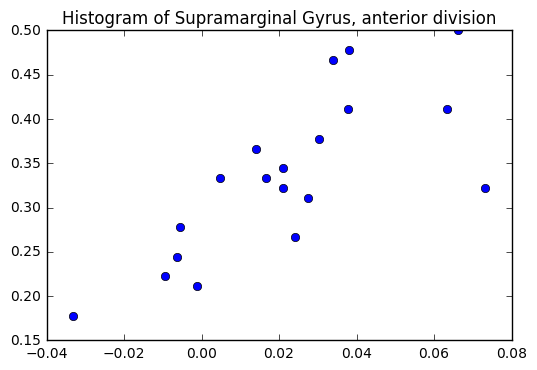

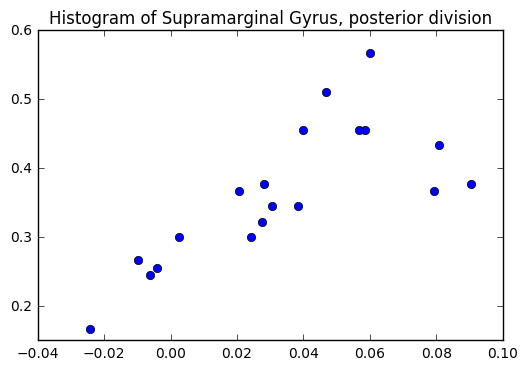

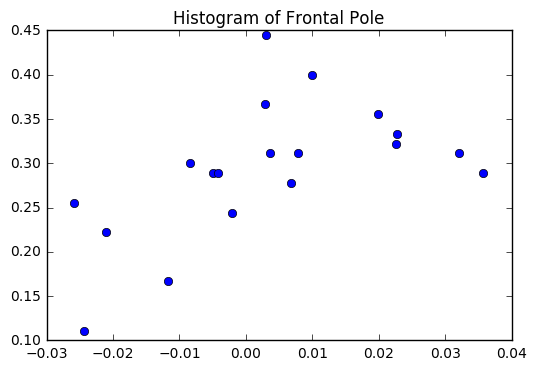

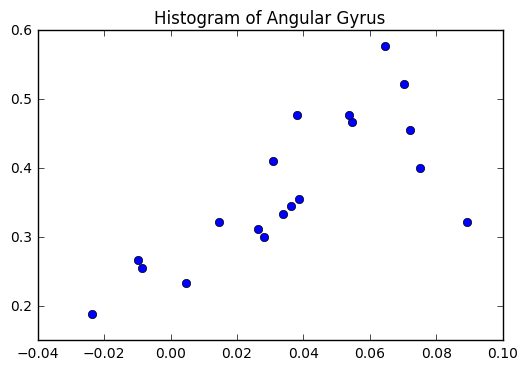

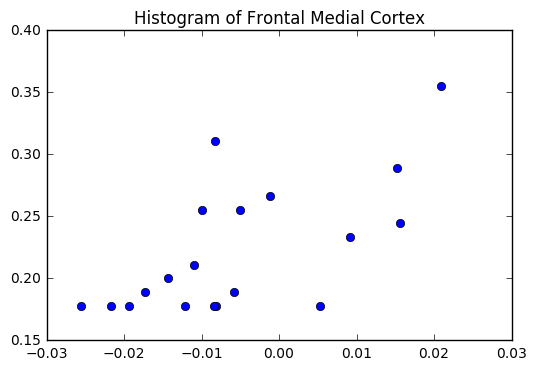

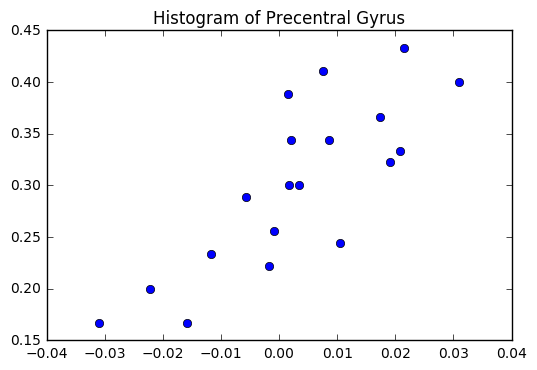

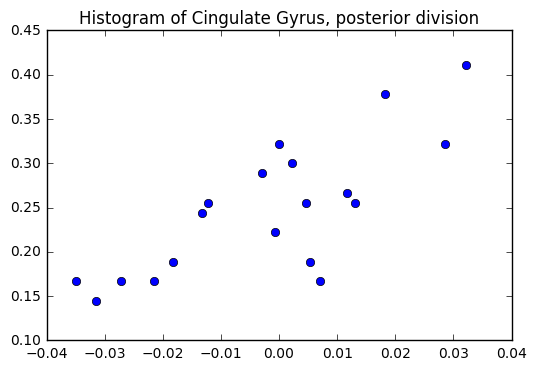

In [37]:
# scatterplot of every brain region between decoding accuracy and RSA performance (correlation) across subjects
for i in range(7):
    plt.plot(subcorrelation[:,i], subaccuracy[:,i], "o")
    plt.title("Histogram of %s" % my_rois[i])
    plt.show()

<div class='alert alert-info'>
**Feedback**: Interesting! Code looks good.
</div>

## Discussion & conclusions

Though the final output of both analyses were highly alike, the performance of each analysis within each ROI differs. The one sample t-test performed on the correlation scores from RSA had shown the supramarginal gyrus (anterior), supramarginal gyrus (posterior) and angular gyrus to yield significant results – meaning that the correlation scores are significantly above zero. Whereas, the one sample t-test performed on the accuracy scores from decoding analysis had shown non-significant results – meaning that the classification accuracies are not significant from chance levels. We have two explanations for this finding – 1. RSA is a more sensitive measure compared to decoding analysis, and 2. Output from both analyses are capturing similar variances between participants.

Both RSA and decoding analysis utilize distances between representations in N-dimensional space. But RSA is a more sensitive measure compared to decoding analysis because RSA could show how the brain representations are different, whereas, decoding could only show if the representations are different at all. Therefore, decoding analysis would also suffer more if the boundaries between different representations are less clear, as linear separability couldn’t be made between the representations. Whereas, for RSA, parts of the similarity between representations could still be captured. This could explain why there were three significant ROIs for the RSA but no significant ROIs for the decoding analysis.

From both analyses, we also observe differences in correlation (from RSA) and accuracies (from decoding analysis) between participants. Some participants have consistently shown high correlation and accuracies scores and vice versa. There could be a higher signal-to-noise ratio for certain participants whereas a low signal-to-noise ratio for other participants and this variance is captured by both analyses. Therefore, the final correlation  performed on the output from both analyses could be only informing us of this variance but not information relevant to the research question itself. 

One limitation of this study is that we've now only looked at a particular paradigm with 3 features that do not seem very different from each other and compared RSA and decoding. It would interesting for future research to choose a research topic from which we know the features are easily seperabel and compare the RSA and decoding of these outcomes, such as gender. Futhermore, we could've investigated multiple ROIs, although the chosen regions are known to be important with understanding emotion of others. In future research, instead of looking at specific ROIs, we could use a different feature selector, such as selectKbest features or feature extraction such as PCA. 

In conclusion, RSA and decoding are not that different after all, but more reseach is needed to get a better understanding of the differences and similarities between RSA and decoding. 

<div class='alert alert-info'>
**Feedback**: Hmm, I don't think I fully agree with your second paragraph. The simples categorical/conceptual RDM, in which trials from the same condition are 0 and between conditions are 1, I think that they also *only* measure *if* the patterns are different. Also, with regard to your second paragraph: yes, I agree, but wasn't this exactly your research question? (That is, to show that categorical RDMs and decoding capture the same signal, which implies that their performance estimates, which may vary across subjects, will correlate if they indeed capture the same signal.) 
</div>

### References
- Haxby, J. V. (2012). Multivariate pattern analysis of fMRI: the early beginnings. Neuroimage, 62(2), 852-855.
- Johnson, M.K., Raye, C.L., Mitchell, K.J., Touran, S.R., Greene, E.J., Nolen-Hoeksema, S. (2006). Dissociating medial frontal and posterior cingulate activity during self-reflection. Soc Cogn Affect Neurosci, 1 (1), 56-64
- Kriegeskorte, N., & Kievit, R. A. (2013). Representational geometry: integrating cognition, computation, and the brain. Trends in cognitive sciences, 17(8), 401-412.
- Pereira, F., Mitchell, T., & Botvinick, M. (2009). Machine learning classifiers and fMRI: a tutorial overview. Neuroimage, 45(1), S199-S209.